# 1960年〜のアメリカのインフレ率・FFレート・10年債利回り・S&P500・ゴールドの推移を、2013年〜と比較

- インフレ率：https://fred.stlouisfed.org/series/CPIAUCSL
- FFレート：https://fred.stlouisfed.org/series/FF
- 10年債利回り：https://fred.stlouisfed.org/series/DGS10
- S&P500：https://stooq.com/q/d/?s=%5Espx
- GOLD 1950-2018：https://datahub.io/AcckiyGerman/gold-prices
- GOLD 1975-：https://www.investing.com/commodities/gold-historical-data

In [1]:
import yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
c20_start_date = '1965-09-01'
c20_end_date = '1989-12-31'
c21_start_date = '2013-05-01'
#c21_start_date = '2018-05-01'

In [3]:
# FRED FFデータ
data = pd.read_csv('data/FF.csv', sep=',',index_col='DATE',parse_dates=True)
data = data.resample('M').first()

# データを切り出す
data_ff_c20 = data[c20_start_date:c20_end_date]
data_ff_c21 = data[c21_start_date:]

data_range_ff_c20 = range(len(data_ff_c20))
data_range_ff_c21 = range(len(data_ff_c21))

In [4]:
# FRED CPIデータ
data = pd.read_csv('data/CPIAUCSL.csv', sep=',',index_col='DATE',parse_dates=True)
data = data.resample('M').first()

# データを切り出す
data_cpi_c20 = data[c20_start_date:c20_end_date]
data_cpi_c21 = data[c21_start_date:]

data_range_cpi_c20 = range(len(data_cpi_c20))
data_range_cpi_c21 = range(len(data_cpi_c21))

In [5]:
# FRED US10Y(10年債利回り)データ
data = pd.read_csv('data/DGS10.csv', sep=',',index_col='DATE',parse_dates=True)
data = data.resample('M').first()

# データを切り出す
data_us10y_c20 = data[c20_start_date:c20_end_date]
data_us10y_c21 = data[c21_start_date:]

data_range_us10y_c20 = range(len(data_us10y_c20))
data_range_us10y_c21 = range(len(data_us10y_c21))

In [6]:
# S&P500データ
data = pd.read_csv('data/spx_d.csv', sep=',',index_col='Date',parse_dates=True)
data = data.resample('M').first()

# データを切り出す
data_spx_c20 = data[c20_start_date:c20_end_date]
data_spx_c21 = data[c21_start_date:]

data_range_spx_c20 = range(len(data_spx_c20))
data_range_spx_c21 = range(len(data_spx_c21))

In [7]:
# GOLDデータ
data = pd.read_csv('data/data_csv.csv', sep=',',index_col='date',parse_dates=True)
data = data.resample('M').first()

# データを切り出す
data_gold_c20 = data[c20_start_date:c20_end_date]
data_range_gold_c20 = range(len(data_gold_c20))

data = pd.read_csv('data/Gold Futures Historical Data.csv', sep=',',index_col='Date',parse_dates=True)
data = data.resample('M').first()

data['Price'] = data['Price'].str.replace(',', '').astype(float)

# データを切り出す
data_gold_c21 = data[c21_start_date:]
data_range_gold_c21 = range(len(data_gold_c21))

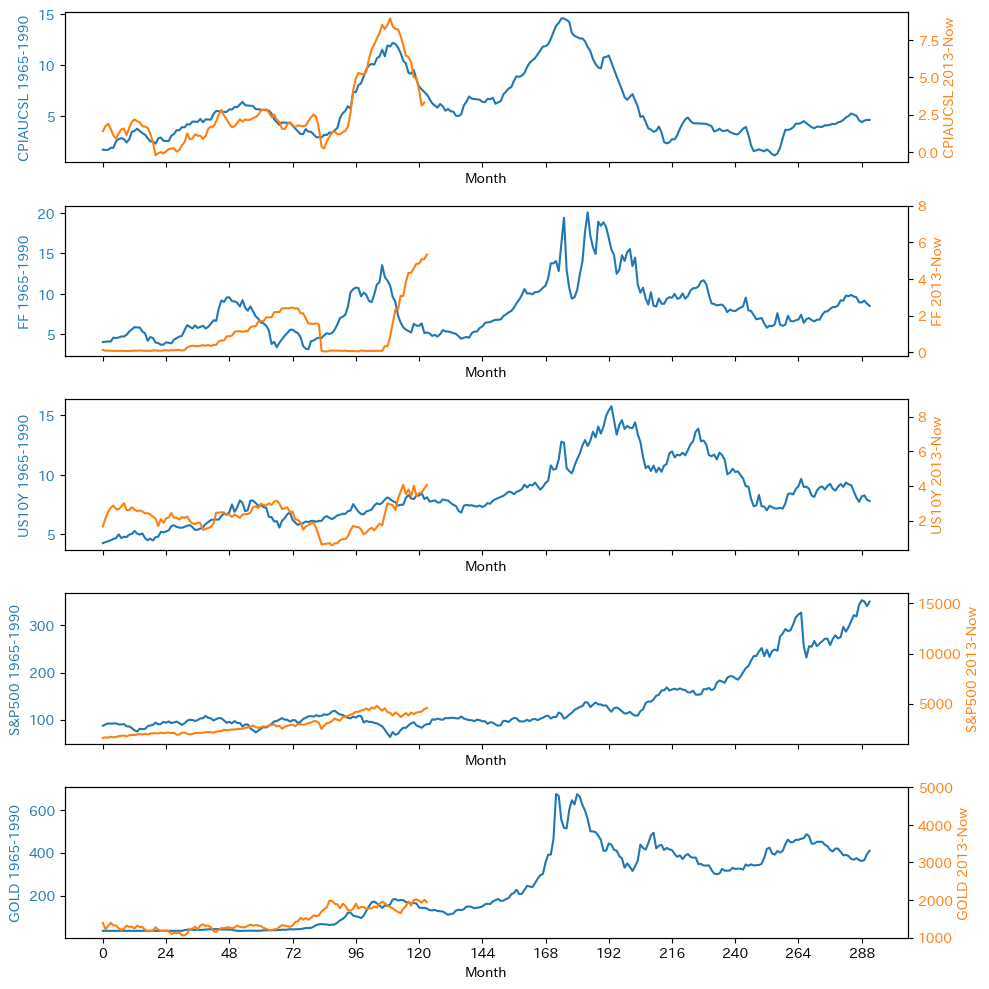

In [18]:
# グラフを描画
fig, (ax1, ax3, ax5, ax7, ax9) = plt.subplots(5, 1, figsize=(10, 10), sharex=True)

# 1965年からのCPIをプロット（左側のY軸）
ax1.plot(data_range_cpi_c20, data_cpi_c20['CPIAUCSL_PC1'], label='1965-1990', color='tab:blue')
ax1.set_xlabel('Month')
ax1.set_ylabel('CPIAUCSL 1965-1990', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# 右側のY軸を作成
ax2 = ax1.twinx()

# 2013年からのCPIをプロット（右側のY軸）
ax2.plot(data_range_cpi_c21, data_cpi_c21['CPIAUCSL_PC1'], label='2013-', color='tab:orange')
ax2.set_ylabel('CPIAUCSL 2013-Now', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# CPIのグラフの下に、1965年からのFFをプロット（左側のY軸）
ax3.plot(data_range_ff_c20, data_ff_c20['FF'], label='1965-1990', color='tab:blue')
ax3.set_xlabel('Month')
ax3.set_ylabel('FF 1965-1990', color='tab:blue')
ax3.tick_params(axis='y', labelcolor='tab:blue')

# 右側のY軸を作成
ax4 = ax3.twinx()

# 2013年からのFFをプロット（右側のY軸）
ax4.plot(data_range_ff_c21, data_ff_c21['FF'], label='2013-', color='tab:orange')
ax4.set_ylim(-0.2, 8.0)
ax4.set_ylabel('FF 2013-Now', color='tab:orange')
ax4.tick_params(axis='y', labelcolor='tab:orange')

# FFのグラフの下に、1965年からのUS10Yをプロット（左側のY軸）
ax5.plot(data_range_us10y_c20, data_us10y_c20['DGS10'], label='1965-1990', color='tab:blue')
ax5.set_xlabel('Month')
ax5.set_ylabel('US10Y 1965-1990', color='tab:blue')
ax5.tick_params(axis='y', labelcolor='tab:blue')

# 右側のY軸を作成
ax6 = ax5.twinx()

# 2013年からのUS10Yをプロット（右側のY軸）
ax6.plot(data_range_us10y_c21, data_us10y_c21['DGS10'], label='2013-', color='tab:orange')
ax6.set_ylim(0.3, 9.0)
ax6.set_ylabel('US10Y 2013-Now', color='tab:orange')
ax6.tick_params(axis='y', labelcolor='tab:orange')

# US10Yのグラフの下に、1965年からのS&P500をプロット（左側のY軸）
ax7.plot(data_range_spx_c20, data_spx_c20['Close'], label='1965-1990', color='tab:blue')
ax7.set_xlabel('Month')
ax7.set_ylabel('S&P500 1965-1990', color='tab:blue')
ax7.tick_params(axis='y', labelcolor='tab:blue')

# 右側のY軸を作成
ax8 = ax7.twinx()

# 2013年からのS&P500をプロット（右側のY軸）
ax8.plot(data_range_spx_c21, data_spx_c21['Close'], label='2013-', color='tab:orange')
ax8.set_ylim(1000, 16000)
ax8.set_ylabel('S&P500 2013-Now', color='tab:orange')
ax8.tick_params(axis='y', labelcolor='tab:orange')

# S&P500のグラフの下に、1965年からのGOLDをプロット（左側のY軸）
ax9.plot(data_range_gold_c20, data_gold_c20['price'], label='1965-1990', color='tab:blue')
ax9.set_xlabel('Month')
ax9.set_ylabel('GOLD 1965-1990', color='tab:blue')
ax9.tick_params(axis='y', labelcolor='tab:blue')

# 右側のY軸を作成
ax10 = ax9.twinx()

# 2013年からのGOLDをプロット（右側のY軸）
ax10.plot(data_range_gold_c21, data_gold_c21['Price'], label='2013-', color='tab:orange')
ax10.set_ylim(1000, 5000)
ax10.set_ylabel('GOLD 2013-Now', color='tab:orange')
ax10.tick_params(axis='y', labelcolor='tab:orange')

# グラフを表示
plt.xticks(np.arange(0,  len(data_range_gold_c20), 24))
plt.tight_layout()
plt.show()